In [54]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

# Basics of Confidence Intervals

We have seen that modeling leads to estimates, such as the typical time that a bus is late ({numref}`Chapter %s <ch:modeling>`), an humidity adjustment to an air quality measurement ({numref}`Chapter %s <ch:modeling>`), or an estimate of vaccine efficacy ({numref}`Chapter %s <ch:scope>`).  These examples are point estimates: the median lateness of the bus is 0.74 minutes; the humidity adjustment to air quality is -0.86 PM2.5 per humidity percentage point; and the ratio of COVID infection rates in  vaccine efficacy is 0.67. However, a different sample would have produced a different estimate. Simply providing a point estimate doesn't give a sense of the estimate's precision. On the other hand, an interval estimate can reflect the estimate's accuracy. These intervals typically take one of two forms:

1. A *bootstrap confidence interval* created from the percentiles of the bootstrap sampling distribution;
1. A *normal confidence interval* constructed using the standard error (SE) of the sampling distribution and additional assumptions about the distribution having the shape of a normal curve. 

We describe these two types of intervals and then give an example.

Recall the sampling distribution (see {numref`Figure %s <fig:triptych>`) is a probability distribution that reflects the chance of observing different values of $\hat{\theta}$. Confidence intervals are constructed from a procedure that uses the spread of the sampling distribution of $\hat{\theta}$. That is, the endpoints of the interval are random because they are based on $\hat{\theta}$, and they are designed so that 95% of the time the interval will cover $\theta^*$. The actual interval that is produced from the observed statistic is called a confidence interval because we do not know whether it is one of the random intervals that contains $\theta^*$ or not, we only know that 95% of the time an interval constructed in this way covers $\theta^*$.    

As its name suggests, the percentile-based bootstrap confidence interval is created from the percentiles of the bootstrap sampling distribution. Specifically, we compute the quantiles of the sampling distribution of $\hat{\theta}_B$, where $\hat{\theta}_B$ are the bootstrapped statistics. 
For a 95% percentile interval, we identify the 2.5 and 97.5 quantiles, called $q_{2.5,B}$ and $q_{97.5,B}$, respectively, where 95% of the time the bootstrapped statistic is in the interval:

$$ q_{2.5,B} \leq \hat{\theta}_B~ \leq ~ q_{97.5,B}.$$

This bootstrap percentile confidence interval is considered a quick and dirty interval. There are many alternatives that adjust for bias, take into consideration the shape of the distribution, and are better suited for small samples. See Hesterberg for examples. 

The percentile confidence interval does not rely on the sampling distribution having a particular shape or the center of the distribution being $\theta^*$. In contrast, the normal confidence interval is often doesn't require bootstrapping to compute, but it does make additional assumptions about the shape of the sampling distribution. 

We use the normal confidence interval when the sampling distribution is well-approximated by a normal curve. For a normal probability distribution, with center $\mu$ and spread $\sigma$, there is a 95% chance that the a random value from this distribution is in the interval $\mu ~\pm ~ 1.96 \sigma$. Since the center of the sampling distribution is typically $\theta^*$, the chance is 95% that for a randomly generated $\hat{\theta}$: 

$$|\hat{\theta} -\theta^*| \leq 1.96 SE(\hat{\theta}),$$

where $SE(\hat{\theta})$ is the spread of the sampling distribution of $\hat{\theta}$. We use this inequality to make a 95% confidence interval for $\theta^*$:

$$ [ \hat{\theta} ~-~ 1.96 SE(\hat{\theta}),~~~  \hat{\theta} ~ +~ 1.96 SE(\hat{\theta})]$$

Other size confidence intervals can be formed with different multiples of $SE(\hat{\theta})$, all based on the normal curve. For example, a 99% confidence interval is $\pm 2.58 SE$, and a one-sided upper 95% confidence interval is $[ \hat{\theta} ~-~ 1.64 SE(\hat{\theta}),~~ \infty]$.

Note that the procedure to create an interval based on the random $\hat{\theta} \pm 1.96SE$ will cover $\theta^*$ 95% of the time, but we don't know whether the actual interval made from the observed value of the statistic covers $\theta^*$. This is why it is called a confidence interval, and not a probability interval, and why we make statements like: we are 95% confident that the true $\theta^*$ is in the interval.   

We provide an example of each type of interval next.

## Confidence intervals for a coefficient

Earlier in this chapter we tested the hypothesis that the coefficient for humidity in a linear model for air quality is 0. The fitted coefficient given the data was $-0.086$. Since the null model did not completely specify the data generation mechanism, we resorted to bootstrapping. That is, we used the data as the population, took a sample of 11,226 records with replacement from the bootstrap population, and fitted the model to find the bootstrap sample coefficient for humidity. Our simulation repeated this process 10,000 times, to get an approximate bootstrap sampling distribution, which we display again below.

In [93]:
boot_theta_hat = np.loadtxt('data/bootstrapped_theta.csv')

Text(0.5, 0, 'Humidity Coefficient $\\hat{\\theta}_B$')

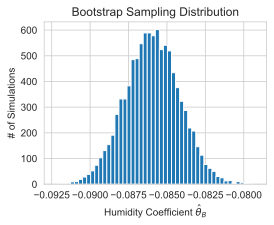

In [98]:
plt.hist(boot_theta_hat, bins=50)
plt.title('Bootstrap Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel(r'Humidity Coefficient $\hat{\theta}_B$')

We can use the percentiles of this bootstrap sampling distribution to create a 99% confidence interval for $\theta^*$. To do this, we find the quantiles, $q_{0.5}$ and $q_{99.5}$ of the bootstrap sampling distribution.  

In [99]:
q_995 = np.percentile(boot_theta_hat, 99.5, interpolation='lower')
q_005 = np.percentile(boot_theta_hat, 0.05, interpolation='lower')

print('Lower 0.05th percentile: ', q_005, 
      '\nUpper 99.5th percentile: ', q_995)

Lower 0.05th percentile:  -0.09153157699763106 
Upper 99.5th percentile:  -0.0812656642160346


Since that the histogram of the sampling distribution looks roughly normal in shape, we can create a 99% confidence interval based on the normal distribution. First, we find the $SE(\hat{\theta})$, which is just the standard deviation of the sampling distribution of $\hat{\theta}$,  

In [92]:
SE = np.std(boot_theta)
SE

0.0017732774029417925

Then, a 99% confidence interval for $\theta^*$ is $2.58$ SEs away from the observed $\hat{\theta}$ in either direction:  

In [82]:
print('Lower 0.05th endpoint: ', theta_hat - (2.58 * SE), 
      '\nUpper 99.5th endpoint: ', theta_hat + (2.58 * SE))

Lower 0.05th endpoint:  -0.09100792823719875 
Upper 99.5th endpoint:  -0.0808647814923717


These two intervals (bootstrap percentile and normal) are quite close, but not identical. We might expect this given how symmetric and "normal looking" the bootstrapped sampling distribution appeared to be. 

There are other versions of the normal-based confidence interval that reflect the inaccuracy in estimating the standard error of the sampling distribution. And still other confidence intervals for statistics that are percentiles, rather than averages. If you are interested in learning more, see XXX.

In the next section we focus on how to interpret confidence intervals and the connection to hypothesis testing.